# Change Point Model: comparison with the R package

> The difference between the two versions is **negligible**, meaning that pyCPM can effectively replace the R package. 
>
> Our pyCPM allows Python users to perform their Change Detection experiments without the need to install R.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data import generate_data

# Our PyCPM
from src.pyCPM import pyCPM
from src.StatisticalTest import MannWhitneyU, Mood, Lepage

# CPM package in R
from src.cpm_r import cpm_r

from src.Plotter import Plotter
plotter = Plotter(figsize=(12, 6), dpi=500)

### Generate data

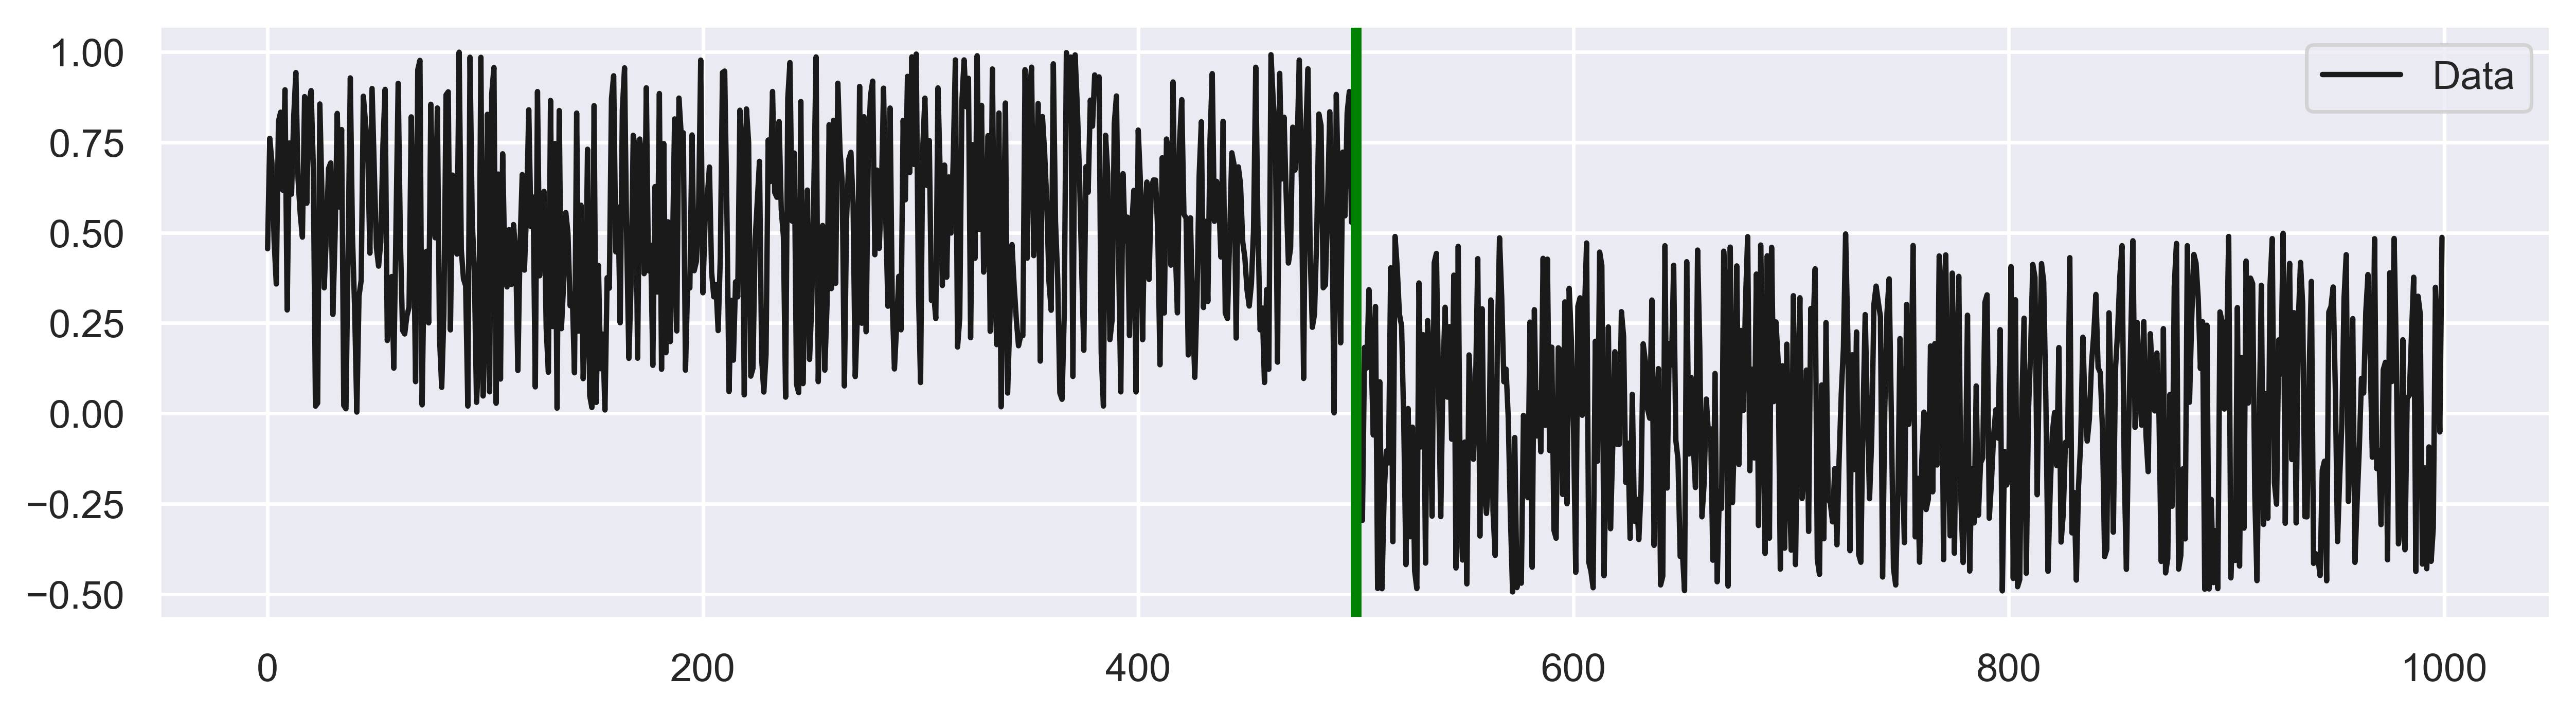

In [3]:
x, y, cp_gt = generate_data()
Plotter(figsize=(12, 3), dpi=500).plot(x, y, cp_gt=cp_gt)

### Run our Py-CPM

In [4]:
min_obs = 8
_, stats_mw = pyCPM(test=MannWhitneyU, min_obs=min_obs).detect_changes(y)
_, stats_mo = pyCPM(test=Mood, min_obs=min_obs).detect_changes(y)
_, stats_lp = pyCPM(test=Lepage, min_obs=min_obs).detect_changes(y)

### Run R-CPM

In [5]:
stats_mw_r = cpm_r(y, 'Mann-Whitney', min_obs=min_obs)
stats_mo_r = cpm_r(y, 'Mood', min_obs=min_obs)
stats_lp_r = cpm_r(y, 'Lepage', min_obs=min_obs)

Difference Ours and R versions: 1.595967802359155e-11


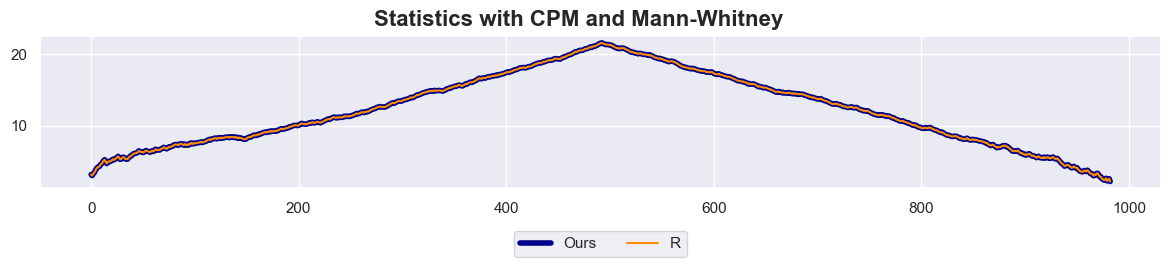

Difference Ours and R versions: 4.752960178211474e-13


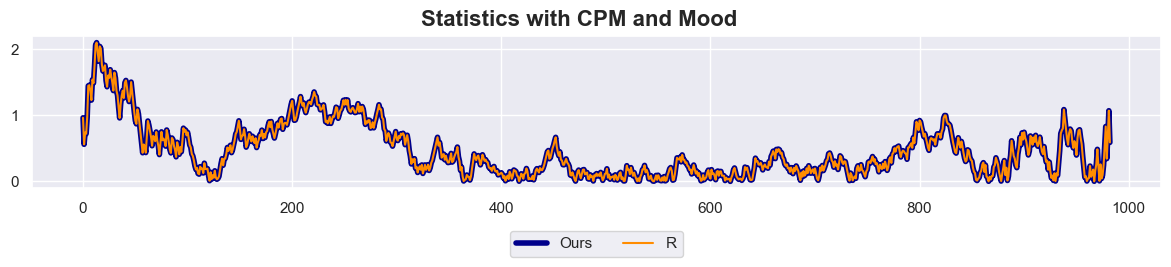

Difference Ours and R versions: 1.6567458516192346e-10


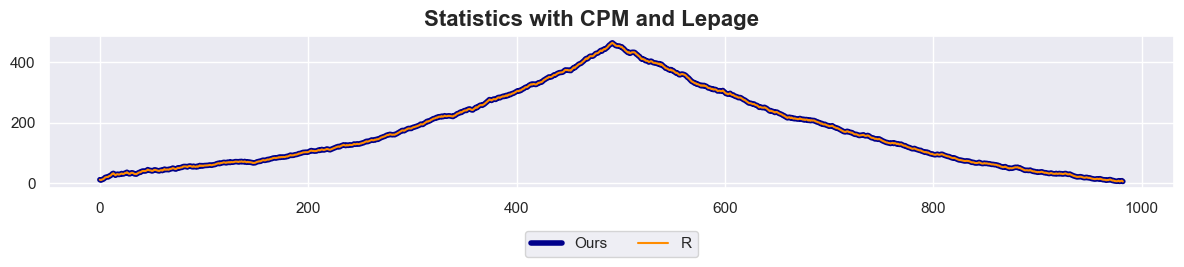

In [6]:
plotter.compare_stats(stats_py=stats_mw, stats_r=stats_mw_r, min_obs=min_obs,
                      title='Statistics with CPM and Mann-Whitney', fname='mw')
plotter.compare_stats(stats_py=stats_mo, stats_r=stats_mo_r, min_obs=min_obs,
                      title='Statistics with CPM and Mood', fname='mo')
plotter.compare_stats(stats_py=stats_lp, stats_r=stats_lp_r, min_obs=min_obs,
                      title='Statistics with CPM and Lepage', fname='lp')